# Project - Ensemble Techniques

### By Mohan Raju

## Data Description:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
### Domain:
Banking
### Context:
Leveraging customer information is paramount for most businesses. In the case of a bank, attributes of customers like the ones mentioned below can be crucial in strategizing a marketing campaign when launching a new product.

### Attribute Information:

1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. balance: average yearly balance, in euros (numeric)
7. housing: has housing loan? (categorical: 'no','yes','unknown')
8. loan: has personal loan? (categorical: 'no','yes','unknown')
9. contact: contact communication type (categorical: 'cellular','telephone')
10. day: last contact day of the month (numeric 1 -31)
11. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
12. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
17. target: has the client subscribed a term deposit? (binary: "yes","no")

In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import load_boston
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn import tree
from os import system
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image

In [2]:
# 2. Read the data as a data frame
dataframe = pd.read_csv('bank-full.csv')
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Exploratory Data Analysis

In [4]:
# 3. Perform basic EDA which should include the following and print out your insights at every step.
# a. Shape of the data
dataframe.shape

(45211, 17)

There are 15211 Observations / Rows and 17 Attributes / Columns

In [5]:
# b. Data type of each attribute
dataframe.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

 Numeric

1. Age (numeric) 
2. Day: last contact day of the month (numeric 1 -31) 
3. Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. 
4. Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) 
5. Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) 
6. Previous: number of contacts performed before this campaign and for this client (numeric) 
7. Balance: average yearly balance, in euros (numeric) 

Categorical

2. Job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') 
3. Marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) 
4. Education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') 
5. Default: has credit in default? (categorical: 'no','yes','unknown') 
7. Housing: has housing loan? (categorical: 'no','yes','unknown') 
8. Loan: has personal loan? (categorical: 'no','yes','unknown') 
9. Contact: contact communication type (categorical: 'cellular','telephone') 
11. Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') 
16. Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') 
17. Target: has the client subscribed a term deposit? (binary: "yes","no") 


In [6]:
# c. Checking the presence of missing values

In [7]:
dataframe.isnull().sum().sum()

0

No missing Value in data.

In [8]:
# d. 5 Point summary of numerical attributes
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


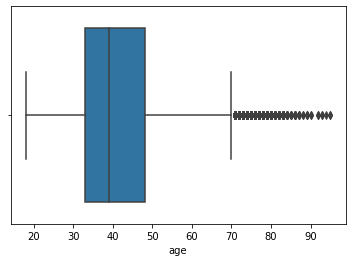

In [9]:
# e. Checking the presence of outliers
sns.boxplot(dataframe['age']) 

In [10]:
# Outlayers present in Age

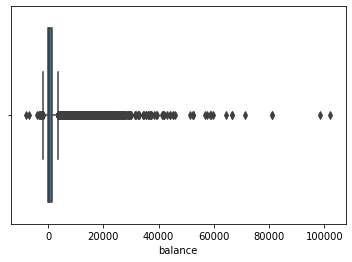

In [11]:
sns.boxplot(dataframe['balance'])

In [12]:
# Outlayers present in Balence

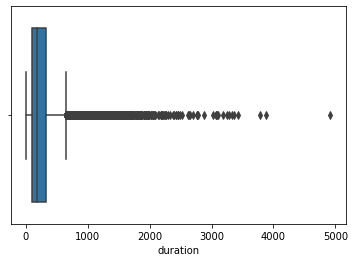

In [13]:
sns.boxplot(dataframe['duration'])

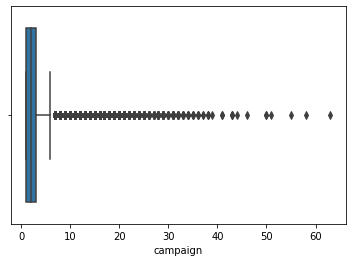

In [14]:
sns.boxplot(dataframe['campaign'])

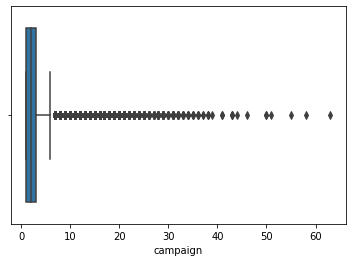

In [15]:
sns.boxplot(dataframe['campaign'])

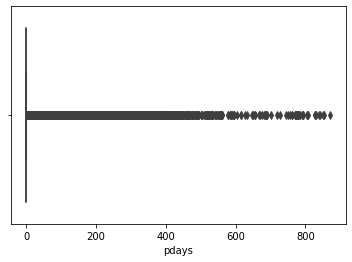

In [16]:
sns.boxplot(dataframe['pdays'])

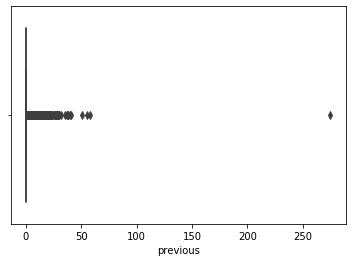

In [17]:
sns.boxplot(dataframe['previous'])

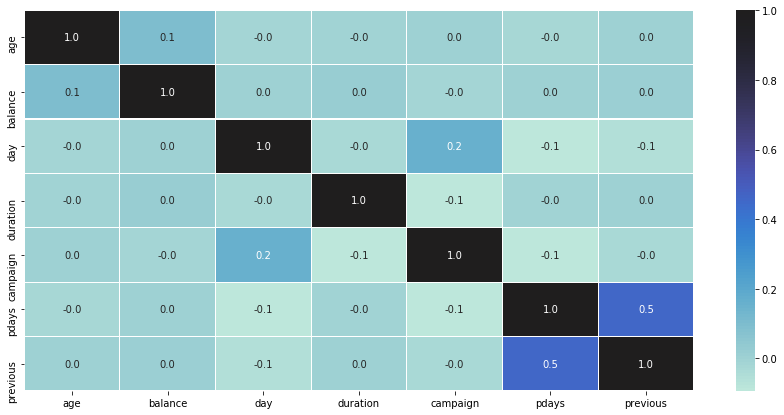

In [18]:
plt.figure(figsize=(15,7))
sns.heatmap(dataframe.corr(), annot=True, linewidths=.1, fmt= '.1f', center = 1 )  # heatmap
plt.show()

In [19]:
from scipy.stats import zscore

dataframe[['balance']].mean()
dataframe[['balance']].mean()

dataframe['balance_outliers'] = dataframe['balance']
dataframe['balance_outliers']= zscore(dataframe['balance_outliers'])

condition1 = (dataframe['balance_outliers']>3) | (dataframe['balance_outliers']<-3 )
dataframe1 = dataframe.drop(dataframe[condition1].index, axis = 0, inplace = False)

In [20]:
dataframe2 = dataframe1.drop('balance_outliers', axis=1)

In [21]:
dataframe2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


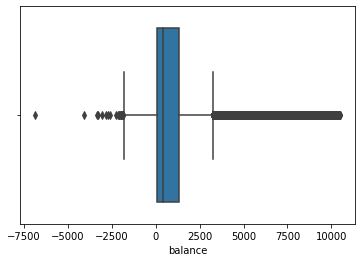

In [22]:
sns.boxplot(dataframe2['balance'])

In [23]:
dataframe2[['age']].mean()
dataframe2[['age']].mean()

dataframe2['age_outliers'] = dataframe2['age']
dataframe2['age_outliers']= zscore(dataframe2['age_outliers'])

condition1 = (dataframe2['age_outliers']>3) | (dataframe2['age_outliers']<-3 )
dataframe3 = dataframe2.drop(dataframe2[condition1].index, axis = 0, inplace = False)


In [24]:
dataframe4 = dataframe3.drop('age_outliers', axis=1)

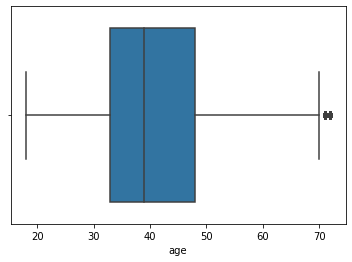

In [25]:
sns.boxplot(dataframe4['age'])

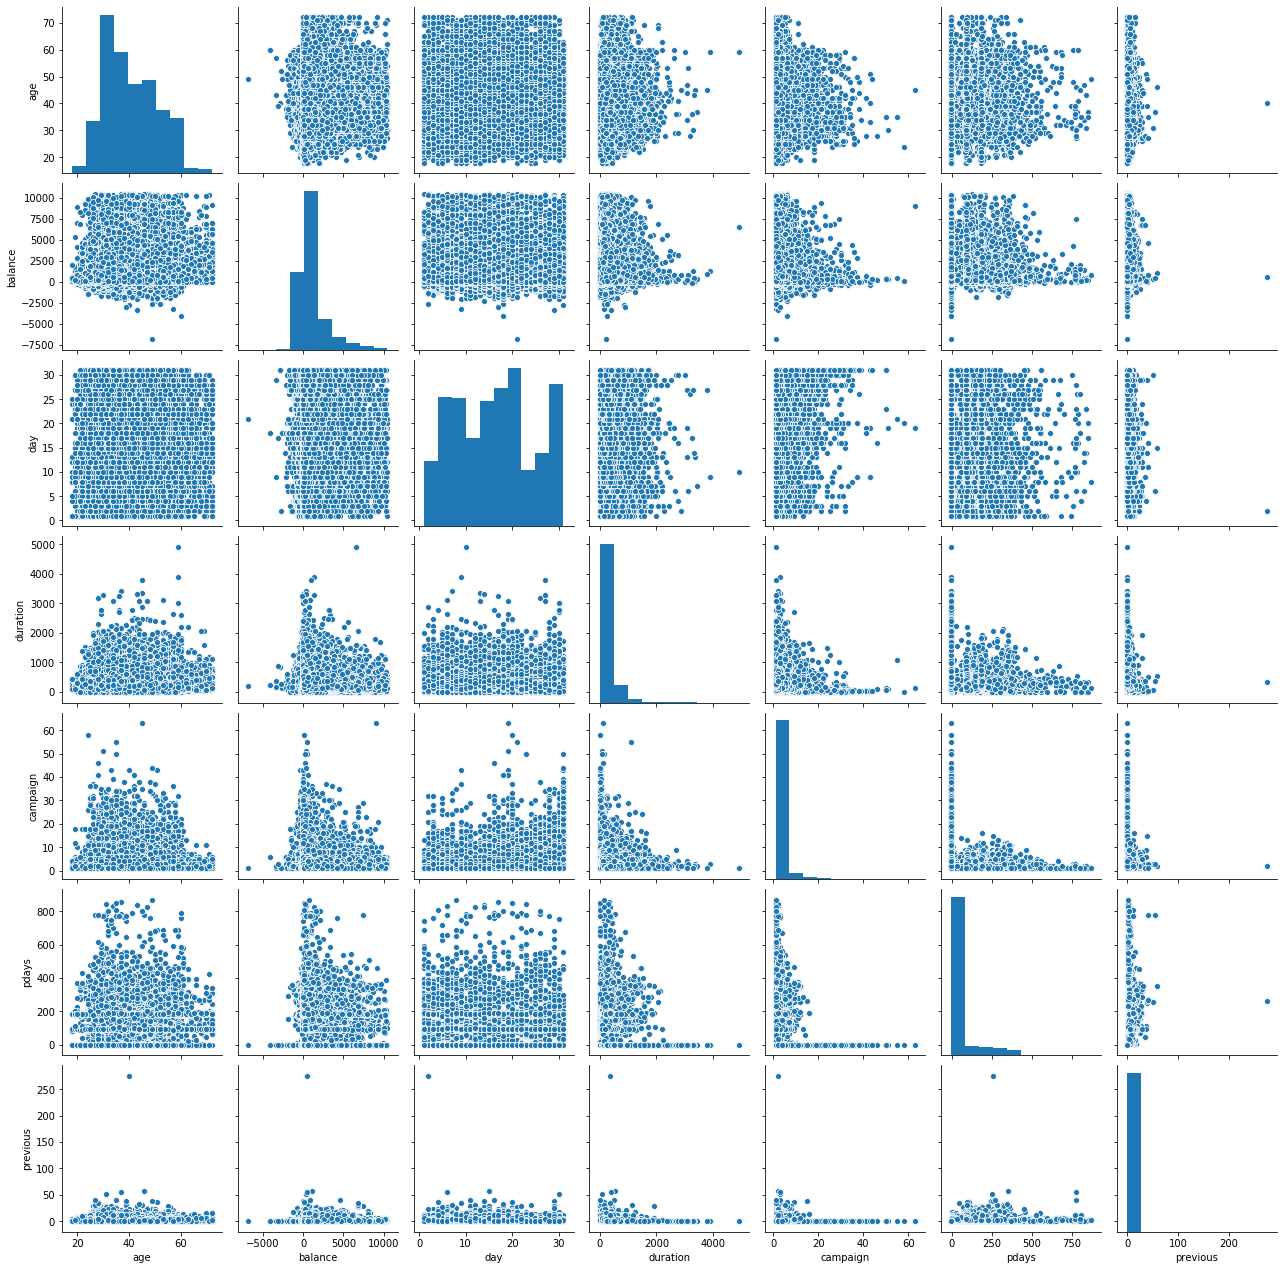

In [26]:
sns.pairplot(dataframe4)

In [27]:
# 4. Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc.

In [28]:
# label encoder to convert categorical variables to one-hot encoding (dummy variables)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataframe4['job'] = le.fit_transform(dataframe3['job'])
dataframe4['marital'] = le.fit_transform(dataframe3['marital'])
dataframe4['education'] = le.fit_transform(dataframe3['education'])
dataframe4['default'] = le.fit_transform(dataframe3['default'])
dataframe4['housing'] = le.fit_transform(dataframe3['housing'])
dataframe4['loan'] = le.fit_transform(dataframe3['loan'])
dataframe4['contact'] = le.fit_transform(dataframe3['contact'])
dataframe4['month'] = le.fit_transform(dataframe3['month'])
dataframe4['poutcome'] = le.fit_transform(dataframe3['poutcome'])
dataframe4['Target'] = le.fit_transform(dataframe3['Target'])



In [29]:
dataframe4.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [30]:
dataframe4.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0
7,42,2,0,2,1,2,1,0,2,5,8,380,1,-1,0,3,0
8,58,5,1,0,0,121,1,0,2,5,8,50,1,-1,0,3,0
9,43,9,2,1,0,593,1,0,2,5,8,55,1,-1,0,3,0


In [31]:
dataframe4.dtypes

age          int64
job          int32
marital      int32
education    int32
default      int32
balance      int64
housing      int32
loan         int32
contact      int32
day          int64
month        int32
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int32
Target       int32
dtype: object

In [32]:
# All catagoical values converted to numeric values

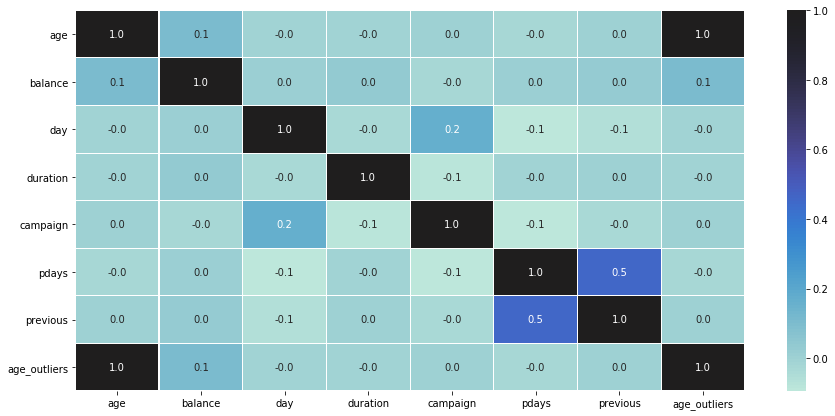

In [33]:
plt.figure(figsize=(15,7))
sns.heatmap(dataframe2.corr(), annot=True, linewidths=.1, fmt= '.1f', center = 1 )  # heatmap
plt.show()

In [34]:
dataframe4.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
age,1.000000,-0.028390,-0.406530,-0.101528,-0.013908,0.094275,-0.161331,-0.000723,0.032669,-0.006971,-0.045030,-0.012893,0.012184,-0.030470,-0.007298,0.015688,-0.005837
job,-0.028390,1.000000,0.062903,0.168415,-0.006573,0.023171,-0.125753,-0.031833,-0.081819,0.023112,-0.094679,0.004058,0.007888,-0.024951,-0.001907,0.012055,0.038687
marital,-0.406530,0.062903,1.000000,0.107123,-0.007993,0.008975,-0.022256,-0.049028,-0.040492,-0.005615,-0.006614,0.011835,-0.011006,0.020487,0.015853,-0.018362,0.051337
education,-0.101528,0.168415,0.107123,1.000000,-0.010489,0.054810,-0.096584,-0.049360,-0.111954,0.023062,-0.059406,0.002658,0.006752,0.000374,0.018714,-0.020370,0.070962
default,-0.013908,-0.006573,-0.007993,-0.010489,1.000000,-0.097975,-0.007948,0.075759,0.015404,0.009630,0.011729,-0.009854,0.016664,-0.030064,-0.018104,0.034951,-0.021399
balance,0.094275,0.023171,0.008975,0.054810,-0.097975,1.000000,-0.063319,-0.100550,-0.031762,0.011188,0.024745,0.034729,-0.022666,0.011757,0.026940,-0.040317,0.068849
housing,-0.161331,-0.125753,-0.022256,-0.096584,-0.007948,-0.063319,1.000000,0.035798,0.189484,-0.030359,0.276602,0.008091,-0.025244,0.127757,0.040068,-0.103741,-0.132779
loan,-0.000723,-0.031833,-0.049028,-0.049360,0.075759,-0.100550,0.035798,1.000000,-0.012097,0.011813,0.022931,-0.011671,0.009503,-0.022126,-0.010035,0.014176,-0.065105
contact,0.032669,-0.081819,-0.040492,-0.111954,0.015404,-0.031762,0.189484,-0.012097,1.000000,-0.027738,0.367229,-0.021519,0.018939,-0.246088,-0.148134,0.273993,-0.148410
day,-0.006971,0.023112,-0.005615,0.023062,0.009630,0.011188,-0.030359,0.011813,-0.027738,1.000000,-0.009619,-0.030255,0.164291,-0.094742,-0.052215,0.085195,-0.030312


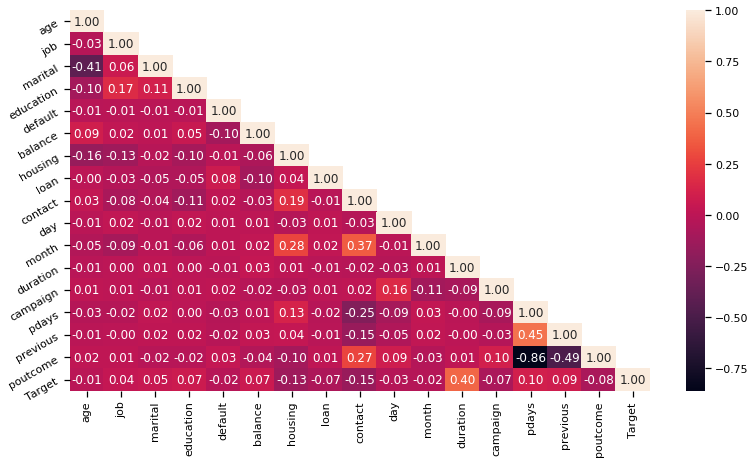

In [35]:
corr = dataframe4.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)


•	Pday and Previous are highly corelated
•	Duration and Target are highly corelated
•	Contact and month are Moderately corelated

Ratio of client who subscribed a term deposit

In [36]:
n_true = len(dataframe4.loc[dataframe4['Target'] == True])
n_false = len(dataframe4.loc[dataframe4['Target'] == False])
print("subscribed for term deposit: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Did not subscribed for term deposit: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

subscribed for term deposit: 5004 (11.35%)
Did not subscribed for term deposit: 39090 (88.65%)


### Preparing the data to train a model

In [37]:
# 4. Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc.

In [38]:
#X_train, X_test, y_train, y_test 
X = dataframe4.drop(['Target'],axis=1) 
Y = dataframe4['Target']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

print(x_train.shape)
print("{0:0.2f}% data is in training set".format((len(x_train)/len(dataframe4.index)) * 100))
print(x_test.shape)
print("{0:0.2f}% data is in test set".format((len(x_test)/len(dataframe4.index)) * 100))

(30865, 16)
70.00% data is in training set
(13229, 16)
30.00% data is in test set


5. Train a few standard classification algorithms, note and 
    comment on their performances across different classification metrics

### Training and making predictions using an Ensemble Model

#### Logistic Regression Model

In [1]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)
LR = model.score(x_test, y_test)

NameError: name 'x_train' is not defined

In [ ]:
print('Accuracy:',LR)
print('confusion_matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
A=LR

In [41]:
model_score = model.score(x_test, y_test)
print(model_score)

0.891828558470028


#### Naive Bayes

In [42]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [43]:
# Train Naive Bayes algorithm 
x = dataframe4.values[:,0:15]
y = dataframe4.values[:,16]

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 7)

In [45]:
clf = GaussianNB()
clf.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [46]:
y_pred = clf.predict(x_test)

In [47]:
NB=accuracy_score(y_test, y_pred, normalize = True) #Accuracy of Naive Bayes' Model
print('Accuracy_score:',NB)

Accuracy_score: 0.8604580845113009


In [48]:
print('Confusion_matrix of NB:')
print(metrics.confusion_matrix(y_test,y_pred))

Confusion_matrix of NB:
[[10724   999]
 [  847   659]]


#### KNN Model

In [49]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

#Neighbors
neighbors = np.arange(0,25)

for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print(accuracy_score(y_test, y_pred))

0.8565273263285207
0.8838914506009524
0.8785244538513871
0.8856300551817976
0.8851009146571925
0.8868395192380376
0.8870662937485827
0.8884269408118527
0.8892584473505178
0.8888048983294278
0.8878222087837327
0.8882757578048227
0.8888804898329428
0.8875954342731877
0.8878222087837327
0.8867639277345226
0.8867639277345226
0.8866127447274926
0.8872174767556127
0.8872174767556127
0.8881245747977927
0.8879733917907627
0.8879733917907627
0.8888048983294278
0.8882757578048227


In [50]:
myList = list(range(1,30))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [51]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    # predict the response
    y_pred = knn.predict(x_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 9


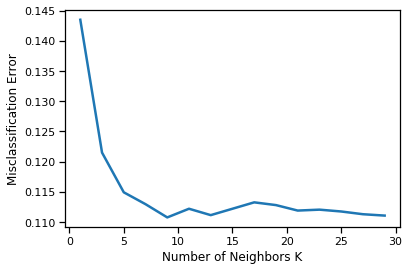

In [52]:
#Plot misclassification error vs k (with k value on X-axis) using matplotlib.
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [53]:
#Use k=19 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 9)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
y_pred = knn.predict(x_test)

# evaluate accuracy
KNN=accuracy_score(y_test, y_pred)   #Accuracy of KNN model
print('Accuracy_score:',KNN)


Accuracy_score: 0.8892584473505178


In [54]:
print('Confusion_matrix:')
print(metrics.confusion_matrix(y_test, y_pred))


Confusion_matrix:
[[11389   334]
 [ 1131   375]]


In [55]:
dataframe4.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


6. Build the ensemble models and compare the results with the base models. 
Note: Random forest can be used only with Decision trees.

In [56]:
# Decision Tree Model using Entopy

In [57]:
for feature in dataframe.columns: # Loop through all columns in the dataframe
    if dataframe[feature].dtype == 'object': # Only apply for columns with categorical strings
        dataframe[feature] = pd.Categorical(dataframe[feature]).codes # Replace strings with an integer


In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
x_train, x_test, train_labels, test_labels = train_test_split(x, y, test_size=.30, random_state=1)
n=dataframe['Target'].count()
train_set = dataframe.head(int(round(n*0.7)))
test_set = dataframe.tail(int(round(n*0.3)))

In [59]:
train_labels = train_set.pop("Target")
test_labels = test_set.pop("Target")

In [60]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [61]:
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [62]:
dt_model.score(test_set , test_labels)
test_pred = dt_model.predict(test_set)

In [63]:
# the feature importance of the decision model
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))

                       Imp
age               0.085741
job               0.031590
marital           0.017648
education         0.026499
default           0.001474
balance           0.058416
housing           0.009637
loan              0.007480
contact           0.021013
day               0.079282
month             0.103546
duration          0.449290
campaign          0.033966
pdays             0.005724
previous          0.002983
poutcome          0.002856
balance_outliers  0.062857


In [64]:
y_predict = dt_model.predict(test_set)

In [65]:
print(dt_model.score(train_set , train_labels))
print(dt_model.score(test_set , test_labels))

1.0
0.6077563960775639


In [66]:
print(metrics.confusion_matrix(test_labels, y_predict))

[[6968 3146]
 [2174 1275]]


In [67]:
# Regularising the Decision Tree overfit
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
reg_dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [68]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))

                       Imp
age               0.085741
job               0.031590
marital           0.017648
education         0.026499
default           0.001474
balance           0.058416
housing           0.009637
loan              0.007480
contact           0.021013
day               0.079282
month             0.103546
duration          0.449290
campaign          0.033966
pdays             0.005724
previous          0.002983
poutcome          0.002856
balance_outliers  0.062857


In [69]:
y_predict = reg_dt_model.predict(test_set)
DTC=reg_dt_model.score(test_set , test_labels)
print(DTC)

0.7508663275086632


In [70]:
print(metrics.confusion_matrix(test_labels, y_predict))

[[9283  831]
 [2548  901]]


### Ensemble Learning

In [71]:
# Ensemble Learning - Bagging

from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50)

#bgcl = BaggingClassifier(n_estimators=50)
bgcl = bgcl.fit(train_set, train_labels)

In [72]:
y_predict = bgcl.predict(test_set)

BGC=bgcl.score(test_set , test_labels)
print(BGC)

print(metrics.confusion_matrix(test_labels, y_predict))

0.6021529160215292
[[7110 3004]
 [2392 1057]]


In [73]:
# Ensemble Learning - AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=10)
#abcl = AdaBoostClassifier( n_estimators=50)
abcl = abcl.fit(train_set, train_labels)

In [74]:
y_predict = abcl.predict(test_set)

ADE=abcl.score(test_set , test_labels)
print(ADE)

print(metrics.confusion_matrix(test_labels, y_predict))

0.6074614760746148
[[6940 3174]
 [2150 1299]]


In [75]:
# Ensemble Learning - GradientBoost
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(train_set, train_labels)

In [76]:
y_predict = gbcl.predict(test_set)
GBC=gbcl.score(test_set , test_labels)
print(GBC)
print(metrics.confusion_matrix(test_labels, y_predict))

0.7566909975669099
[[9209  905]
 [2395 1054]]


In [77]:
# Ensemble RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(train_set, train_labels)

In [78]:
y_predict = rfcl.predict(test_set)
RFC=rfcl.score(test_set , test_labels)
print(RFC)
print(metrics.confusion_matrix(test_labels, y_predict))

0.754257907542579
[[9569  545]
 [2788  661]]


### Compare performances of all the models

In [79]:
models = pd.DataFrame({
                'Models': [ 'Gausian NB','K-Near Neighbors','Logistic Model', 'Decision Tree Classifier',
                            'Bagging Classifier ', 'Adaboost Ensemble ','GradientBoost Classifier ', 'Random Forest Classifier'],
                'Score':  [NB, KNN, LR, DTC, BGC, ADE, GBC, RFC]})

models.sort_values(by='Score', ascending=False)


,Models,Score
2,Logistic Model,0.891829
1,K-Near Neighbors,0.889258
0,Gausian NB,0.860458
6,GradientBoost Classifier,0.756691
7,Random Forest Classifier,0.754258
3,Decision Tree Classifier,0.750866
5,Adaboost Ensemble,0.607461
4,Bagging Classifier,0.602153


#### The classification goal is to predict if the client will subscribe (yes/no) a term deposit so logistic regression model is the high score model in comparison with other models